# CSCI 5502 - Group 15

## Analysis of Contemporary Human Lifespan

by Sukeerth Balakrishna Kalluraya, Malvika Manohar, Behzod Mirpochoev, and Suresh Nayak

In [1]:
import pandas as pd 
import numpy as np
import collections
import string
import os

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from textblob import Word

#Data Visualization
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns

#ML
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingRegressor

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/behzod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/behzod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/behzod/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
file_name = 'AgeDataset-V1.csv'
df = pd.read_csv(file_name)
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


 ### Correlative Nature of Risk Factors in Suicide

In [3]:
df['Manner of death'].value_counts()

natural causes             33532
suicide                     5814
accident                    5044
homicide                    4692
capital punishment          3415
                           ...  
unknown                        1
patricide                      1
suicide; nan                   1
accident; shooting             1
suicide; Aerial ramming        1
Name: Manner of death, Length: 206, dtype: int64

In [4]:
suicide_df = df.loc[df['Manner of death'] == 'suicide']
suicide_df = suicide_df.where(suicide_df['Birth year'] > 1800)
suicide_df = suicide_df.dropna()
suicide_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
14,Q352,Adolf Hitler,"Austrian-born German politician, chancellor an...",Male,Nazi Germany; Austria-Hungary; Weimar Republic...,Statesperson,1889.0,1945.0,suicide,56.0
23,Q440,Salvador Allende,28th president of Chile (1908–1973),Male,Chile,Politician,1908.0,1973.0,suicide,65.0
131,Q1322,José Manuel Balmaceda,Chilean politician and President (1840-1891),Male,Chile,Politician,1840.0,1891.0,suicide,51.0
189,Q2022,Cesare Pavese,"Italian poet, novelist, literary critic, and t...",Male,Italy; Kingdom of Italy,Researcher,1908.0,1950.0,suicide,42.0
323,Q4616,Marilyn Monroe,"American actress, model, and singer (1926-1962)",Female,United States of America,Artist,1926.0,1962.0,suicide,36.0


(0.0, 100.0)

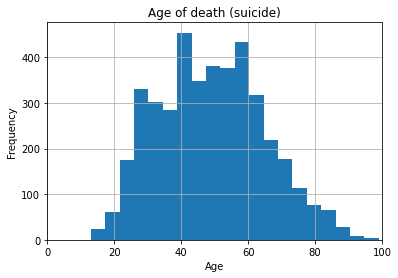

In [5]:
suicide_df.hist('Age of death', bins = 20)
plt.title('Age of death (suicide)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 100)

(0.0, 100.0)

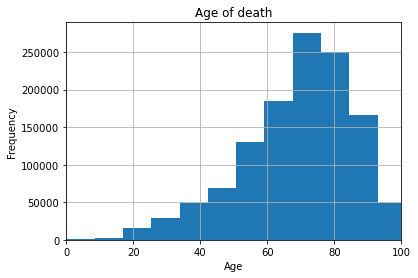

In [6]:
df.hist('Age of death', bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 100)

Text(0.5, 1.0, 'Suicide occurences by birth year')

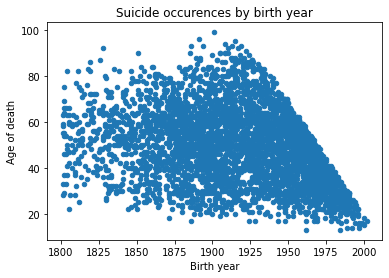

In [7]:
suicide_df.plot.scatter(x='Birth year', y='Age of death')
plt.title('Suicide occurences by birth year')

Text(0.5, 1.0, 'Suicide occurences by death year')

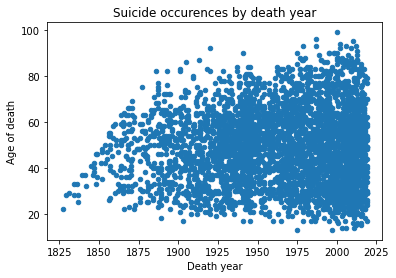

In [8]:
suicide_df.plot.scatter(x='Death year', y='Age of death')
plt.title('Suicide occurences by death year')

In [9]:
suicide_df['Occupation'].value_counts()

Artist                                         1731
Politician                                      580
Athlete                                         497
Military personnel                              245
Researcher                                      244
                                               ... 
Pedagogue; cellist                                1
Criminal; serial killer                           1
Ballet dancer; ballet master; choreographer       1
Critic                                            1
Elevator operator                                 1
Name: Occupation, Length: 312, dtype: int64

In [10]:
df['Occupation'].value_counts()

Artist                                                                         281512
Politician                                                                     195390
Athlete                                                                        110943
Researcher                                                                      90709
Military personnel                                                              52911
                                                                                ...  
Barrister; spy                                                                      1
Coin collecting; coin counterfeiting; designer; film exhibitor; coin dealer         1
Privateer; ship captain                                                             1
Socialite; civil rights advocate                                                    1
Television presenter; mountaineer                                                   1
Name: Occupation, Length: 9313, dtype: int64

In [11]:
suicide_df['Gender'].value_counts()

Male                  3554
Female                 625
Transgender Female       4
Transgender Male         1
Intersex                 1
Name: Gender, dtype: int64

In [12]:
suicide_gender_ratio = suicide_df['Gender'].value_counts()['Male']/suicide_df['Gender'].value_counts()['Female']
print(suicide_gender_ratio)

5.6864


In [13]:
df['Gender'].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Female; Male                                           7
Intersex                                               7
Eunuch                                                 3
Transgender Male; Female                               3
Transgender Female; Male                               2
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Female; Female                                         1
Non-Binary; Intersex                                   1
Transgender Female; Intersex   

In [14]:
age_gender_ratio = df['Gender'].value_counts()['Male'] / df['Gender'].value_counts()['Female']
print(age_gender_ratio)

9.101038671983678


In [15]:
suicide_df['Country'].value_counts()

United States of America                               1111
Germany                                                 328
France                                                  310
United Kingdom                                          174
Japan                                                   125
                                                       ... 
Sweden; France                                            1
Soviet Union; Weimar Republic; German Empire              1
People's Republic of China; Taiwan; China                 1
Kingdom of Bavaria                                        1
France; United Kingdom of Great Britain and Ireland       1
Name: Country, Length: 325, dtype: int64

In [16]:
df['Country'].value_counts()

United States of America                                                                152761
Germany                                                                                  95081
France                                                                                   78666
United Kingdom; United Kingdom of Great Britain and Ireland                              29684
Sweden                                                                                   26915
                                                                                         ...  
France; Belarusian People's Republic                                                         1
Japan; Ryukyu Kingdom                                                                        1
Austria-Hungary; Czechoslovakia; Yugoslavia                                                  1
Argentina; Kingdom of Sardinia                                                               1
Austria-Hungary; Russian Empire; Second Polish Rep

### Prediction Models and Confusion Matrix Related to Age of Death

<AxesSubplot:xlabel='Gender', ylabel='count'>

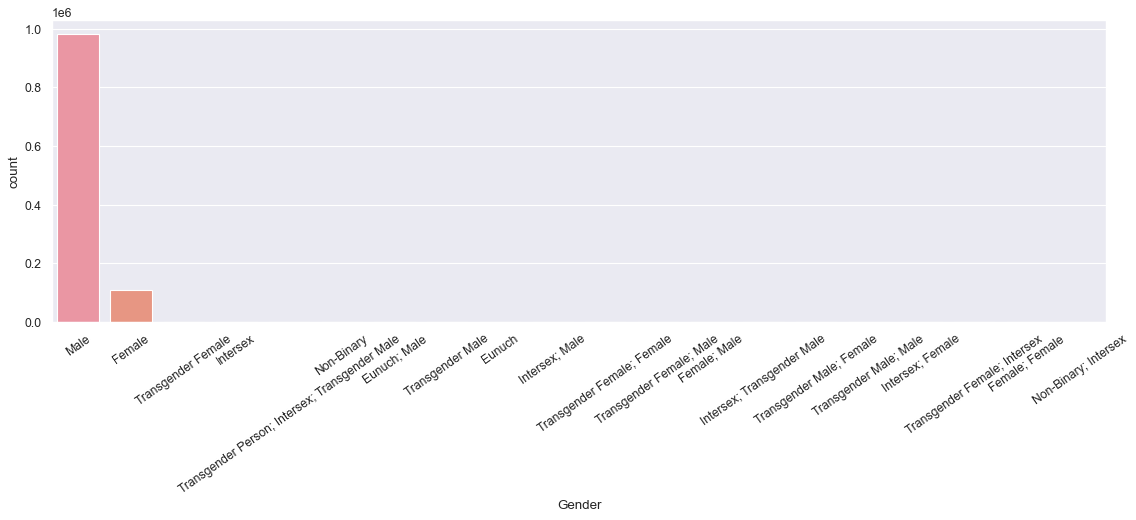

In [17]:
figure(figsize=(17, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender", data=df)

In [18]:
plot_gender = df
print(df.shape)
print(len(df))
plot_gender['Gender'].dropna(inplace=True)
print(len(plot_gender))
plot_gender.head
plot_gender.shape

(1223009, 10)
1223009
1223009


(1223009, 10)

In [19]:
plot_gender['Gender '] = 'Other'
plot_gender['Gender '] = plot_gender.apply(lambda x: x['Gender'] if x['Gender']=='Male' else x['Gender '], axis=1)
plot_gender['Gender '] = plot_gender.apply(lambda x: x['Gender'] if x['Gender']=='Female' else x['Gender '], axis=1)
#plot_gender['Gender_updated'] = plot_gender.apply(lambda x: 'Other' if x['Gender_updated']==np.nan else x['Gender_updated'], axis=1)

<AxesSubplot:xlabel='Gender ', ylabel='count'>

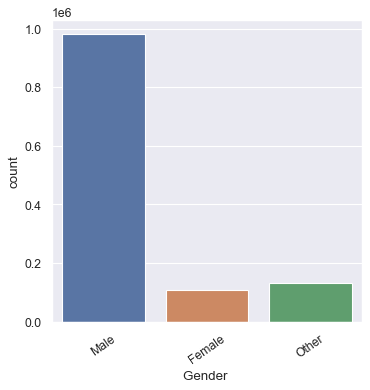

In [20]:
figure(figsize=(5, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender ", data=plot_gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

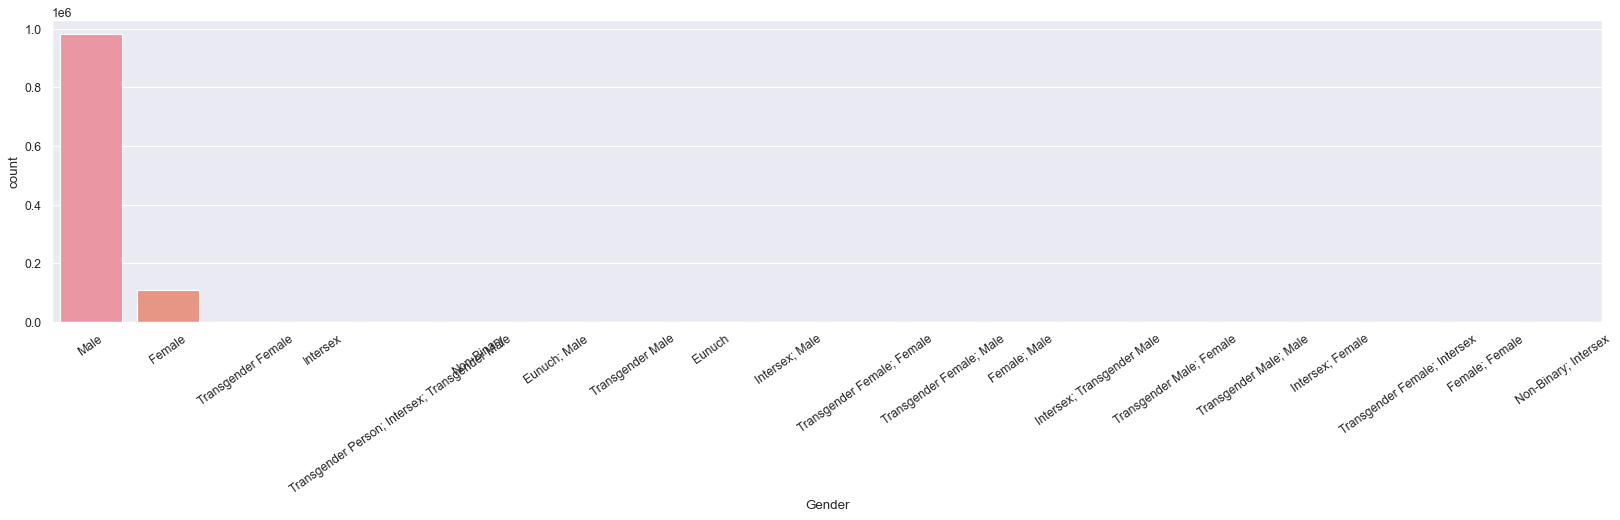

In [21]:
figure(figsize=(25, 5), dpi=80)
sns.set_theme(style="darkgrid")
plt.xticks(rotation=35)
sns.countplot(x="Gender", data=plot_gender)

In [22]:
plot_gender['Gender'].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Female; Male                                           7
Intersex                                               7
Eunuch                                                 3
Transgender Male; Female                               3
Transgender Female; Male                               2
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Female                             1
Intersex; Transgender Male                             1
Female; Female                                         1
Non-Binary; Intersex                                   1
Transgender Female; Intersex   

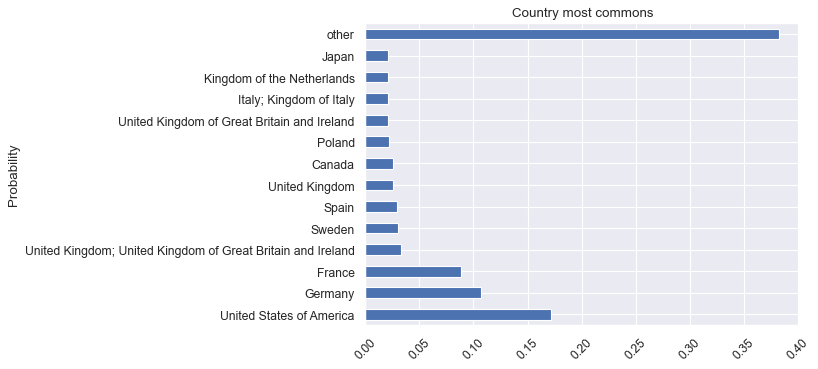

In [23]:
# Setting the color for the graph bars 
colours=['tomato', 'orangered', 'darkorange', 'orange','gold','lemonchiffon','limegreen', 'green','seagreen','lightseagreen',
        'darkturquoise','deepskyblue','dodgerblue','royalblue', 'darkblue','mediumpurple','darkorchid','fuchsia']
figure(figsize=(7, 5), dpi=80)
prob = df.Country.value_counts(normalize=True)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='barh')#,color=colours)
plt.title('Country most commons')
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

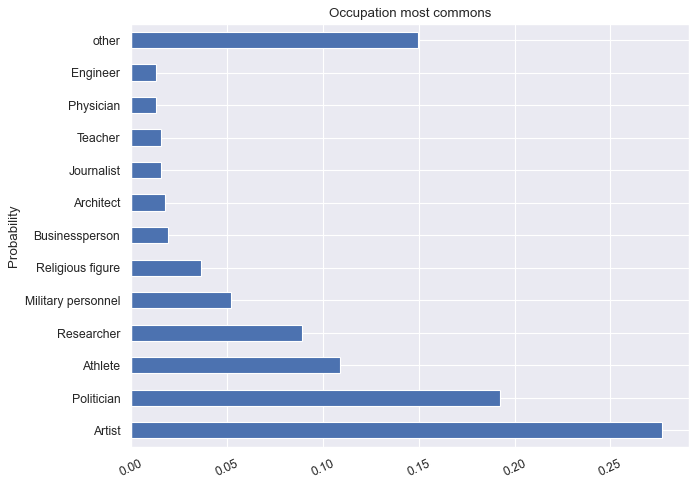

In [24]:
figure(figsize=(9, 7), dpi=80)
prob = df.Occupation.value_counts(normalize=True)
threshold = 0.01
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='barh')#,color=colours)
plt.title('Occupation most commons')
plt.ylabel("Probability")
plt.xticks(rotation=25)
plt.show()

In [25]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Gender
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,Male
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,Male
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,Male
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,Male
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,Male


#### Death in the Workplace

<AxesSubplot:>

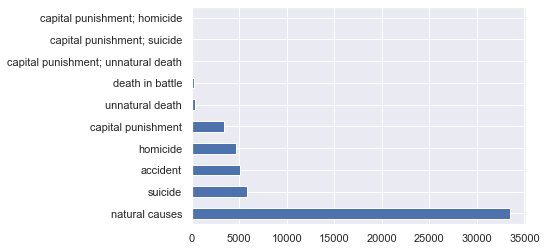

In [26]:
#Finding top 10 causes ofr the death
#.plot(kind='barh') : to plot the bar graph horizontaly
df['Manner of death'].value_counts()[:10].plot(kind='barh')

In [27]:
df['Top_Occupation']=np.nan
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Politician' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Artist' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Athlete' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Researcher' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Military personnel' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Religious figure' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Businessperson' else x['Top_Occupation'], axis=1)
df['Top_Occupation'] = df.apply(lambda x: x['Occupation'] if x['Occupation']=='Teacher' else x['Top_Occupation'], axis=1)

#creating a new column for occupation
df['Top_GD']=np.nan

Keeping all frequent types of deaths except Natural Death 
populating th top_GD colum with top occupations or NAN

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'homicide'),
  Text(1, 0, 'suicide'),
  Text(2, 0, 'accident'),
  Text(3, 0, 'capital punishment'),
  Text(4, 0, 'death in battle'),
  Text(5, 0, 'unnatural death')])

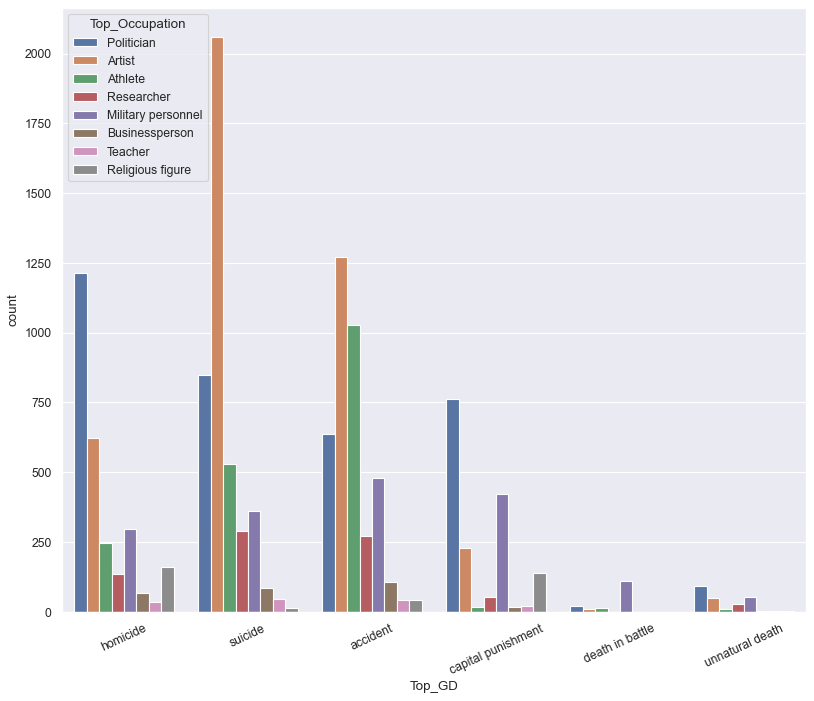

In [28]:
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='homicide' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='suicide' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='accident' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='capital punishment' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='death in battle' else x['Top_GD'], axis=1)
df['Top_GD'] = df.apply(lambda x: x['Manner of death'] if x['Manner of death']=='unnatural death' else x['Top_GD'], axis=1)


figure(figsize=(12, 10), dpi=80)
sns.countplot(x ='Top_GD', hue ="Top_Occupation", data = df)
plt.xticks(rotation=25)

In [29]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Gender,Top_Occupation,Top_GD
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,Male,Politician,NaN
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,Male,Artist,NaN
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,Male,Politician,homicide
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,Male,Artist,NaN
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,Male,Artist,NaN


The average life of people based on the centuries

In [30]:
#creating a subset of datapoins having cause of death as "natural cause"
df_natural_causes= df[df['Manner of death']=='natural causes']
#idx = df.index[df['Birth year']<1700]
#df = df.drop(index=idx)
idx = df_natural_causes.index[df_natural_causes['Death year'] < 1800] 
df_natural_causes = df_natural_causes.drop(index=idx)
df_2=df_natural_causes.groupby(['Death year']).mean()
print(df_2)

             Birth year  Age of death
Death year                           
1800.0      1761.857143     38.142857
1801.0      1757.200000     43.800000
1802.0      1763.133333     38.866667
1803.0      1749.500000     53.500000
1804.0      1762.333333     41.666667
...                 ...           ...
2016.0      1946.256473     69.743527
2017.0      1945.701220     71.298780
2018.0      1946.605769     71.394231
2019.0      1946.806967     72.193033
2020.0      1930.000000     90.000000

[221 rows x 2 columns]


In [31]:
df_natural_causes=pd.merge(df_natural_causes,df_2,how='left', on='Death year')
#idx = df.index[df['Birth year']<1700]
#dividing the table into 8 categoried based on year of death
df_natural_causes['Death_year_bins']=pd.cut(df_natural_causes['Death year'], 8)

Text(0.5, 1.0, 'Age of natural death based on the centuries')

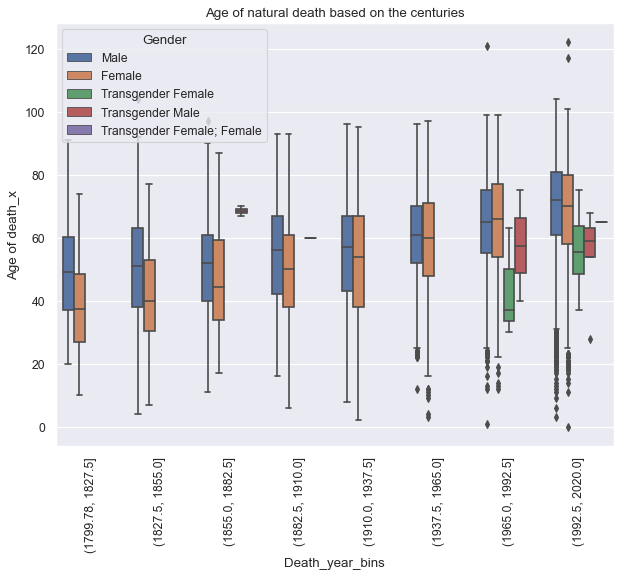

In [32]:
df_natural_causes=df_natural_causes.rename(columns={"Age of death_y": "Age of death_average"})
df_natural_causes=df_natural_causes.drop('Birth year_y', axis=1)

figure(figsize=(9, 7), dpi=80)
sns.boxplot(x='Death_year_bins', y="Age of death_x",hue="Gender", data=df_natural_causes)
plt.xticks(rotation=90)
plt.title("Age of natural death based on the centuries")

ML Models

In [33]:
print(df.isna().sum())

Id                         0
Name                       0
Short description      67900
Gender                133646
Country               335509
Occupation            206914
Birth year                 0
Death year                 1
Manner of death      1169406
Age of death               1
Gender                     0
Top_Occupation        419236
Top_GD               1203486
dtype: int64


In [34]:
df.isna().sum()

#delete the features not useful for machine learning.
df=df.drop(['Death year','Name','Short description','Top_Occupation','Top_GD'],axis=1)

In [35]:
print(len(df))
df.head()

1223009


,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
3,Q254,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,NaN,35.0,Male
4,Q255,Male,Holy Roman Empire; Austrian Empire,Artist,1770,NaN,57.0,Male


In [36]:
#remove all rows with null value
df=df.dropna()
#New database size
print(len(df))
df.head()

45865


,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
5,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,42.0,Male
7,Q296,Male,France,Artist,1840,natural causes,86.0,Male


In [37]:
#I move our Y to the first column
cols = list(df)
#pandas pop method can take input of a column from a data frame and pop that directly
cols.insert(0, cols.pop(cols.index('Age of death')))
df.head()

,Id,Gender,Country,Occupation,Birth year,Manner of death,Age of death,Gender
0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,67.0,Male
1,Q42,Male,United Kingdom,Artist,1952,natural causes,49.0,Male
2,Q91,Male,United States of America,Politician,1809,homicide,56.0,Male
5,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,42.0,Male
7,Q296,Male,France,Artist,1840,natural causes,86.0,Male


In [38]:
df = df.loc[:, cols]
df.head()

,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,Male,United States of America; Kingdom of Great Bri...,Politician,1732,natural causes,Male
1,49.0,Q42,Male,United Kingdom,Artist,1952,natural causes,Male
2,56.0,Q91,Male,United States of America,Politician,1809,homicide,Male
5,42.0,Q260,Male,Kingdom of France; First French Empire,Egyptologist,1790,natural causes,Male
7,86.0,Q296,Male,France,Artist,1840,natural causes,Male


In [39]:
print(cols)

['Age of death', 'Id', 'Gender', 'Country', 'Occupation', 'Birth year', 'Manner of death', 'Gender ']


In [40]:
#Encode nominal column
encoder = preprocessing.LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Country'] = encoder.fit_transform(df['Country'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Manner of death'] = encoder.fit_transform(df['Manner of death'])

In [41]:
df.head()

,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,4,1448,1100,1732,114,Male
1,49.0,Q42,4,1315,83,1952,114,Male
2,56.0,Q91,4,1371,1100,1809,81,Male
5,42.0,Q260,4,661,468,1790,114,Male
7,86.0,Q296,4,336,83,1840,114,Male


In [42]:
#Compute pairwise correlation of columns, excluding NA/null values.
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age of death,Gender,Country,Occupation,Birth year,Manner of death
Age of death,1.00,-0.00,0.13,-0.02,0.08,0.25
Gender,-0.00,1.00,-0.03,0.10,-0.04,-0.06
Country,0.13,-0.03,1.00,-0.09,0.09,0.06
Occupation,-0.02,0.10,-0.09,1.00,-0.16,-0.10
Birth year,0.08,-0.04,0.09,-0.16,1.00,0.11
Manner of death,0.25,-0.06,0.06,-0.10,0.11,1.00


Standardization

The features are not in the same scale, we have to standardize the variables in the X dataset.

In [43]:
df.head()

,Age of death,Id,Gender,Country,Occupation,Birth year,Manner of death,Gender
0,67.0,Q23,4,1448,1100,1732,114,Male
1,49.0,Q42,4,1315,83,1952,114,Male
2,56.0,Q91,4,1371,1100,1809,81,Male
5,42.0,Q260,4,661,468,1790,114,Male
7,86.0,Q296,4,336,83,1840,114,Male


In [44]:
df = df.drop(['Id'],axis=1)
#df=df.drop(['Gender'])
#considering Age of death as column Y and rest of the columns as X
X = df[df.columns[1:5]]

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
#where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.


ss = preprocessing.StandardScaler()

In [45]:
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [46]:
y = df['Age of death']

In [47]:
# split data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

In [48]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (34398, 4)
y_train (34398,)
X_test (11467, 4)
y_test (11467,)


Models

In [49]:
lr= linear_model.LinearRegression()
cv= cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.02187342 0.02187455 0.0174063  0.02022905 0.01914697]
0.020106060248110992


In [50]:
knn= KNeighborsRegressor(n_neighbors=4)
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
cv= cross_val_score(knn,X_train,y_train,cv=2)
print(cv)
print(cv.mean())

[0.21012384 0.21185621]
0.21099002520656102


In [51]:
tree=DecisionTreeRegressor(random_state=1)
cv= cross_val_score(tree,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[-7.52063052e-03 -1.46322483e-02  2.60859494e-03 -3.69691338e-05
  3.52809808e-03]
-0.003210630993180552


In [52]:
rf=RandomForestRegressor(random_state=1)
cv= cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.29543395 0.27925439 0.29627805 0.28662309 0.29002727]
0.28952335136686025


In [53]:
#VotingRegressor
voting_rg=VotingRegressor(estimators=[('knn',knn),('rf',rf)])
cv= cross_val_score(voting_rg,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.30605793 0.28146091 0.30282119 0.29368072 0.30030517]
0.2968651836197794


Predictions
Take just better 3 (KNN, Random Forest and VotingRegressor)we do the predictions.

In [54]:
#KNN
knn.fit(X_train,y_train)
y_knn=knn.predict(X_test)

In [55]:
print("KNN results:")
print("R^2",metrics.r2_score(y_test,y_knn))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_knn))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_knn))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_knn)))

KNN results:
R^2 0.20685588775834296
Mean Absolute Error 12.520253771692683
Mean Squared Error 263.033154922822
Root Mean Squared Error 69186.44058865328


In [56]:
#Random Forest
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)

In [57]:
print("Random Forest results:")
print("R^2",metrics.r2_score(y_test,y_rf))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_rf))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_rf))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_rf)))

Random Forest results:
R^2 0.2678807959701347
Mean Absolute Error 11.966654856314907
Mean Squared Error 242.79525125805577
Root Mean Squared Error 58949.534033462434


In [58]:
#VotingRegressor
voting_rg.fit(X_train,y_train)
y_voting_rg=voting_rg.predict(X_test)

In [59]:
print("Voting Regressor results:")
print("R^2",metrics.r2_score(y_test,y_voting_rg))
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_voting_rg))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_voting_rg))
print("Root Mean Squared Error",np.square(metrics.mean_squared_error(y_test,y_voting_rg)))

Voting Regressor results:
R^2 0.27639202991084566
Mean Absolute Error 11.9733739320892
Mean Squared Error 239.97264098943248
Root Mean Squared Error 57586.86842344305


Results
Create a new database to compare the death years and the predictions made.

In [60]:
file_name = 'AgeDataset-V1.csv'
first_df = pd.read_csv(file_name)
print(X)

         Gender   Country  Occupation  Birth year
0      0.432859  1.020038    1.198150   -1.023387
1      0.432859  0.740775   -0.848056    0.385786
2      0.432859  0.858360    1.198150   -0.530176
3      0.432859 -0.632443   -0.073435   -0.651878
4      0.432859 -1.314853   -0.848056   -0.331611
...         ...       ...         ...         ...
45860  0.432859  0.742875    1.695114   -0.542987
45861  0.432859 -1.491230   -0.848056    0.084735
45862 -2.287115  0.740775    1.491902    0.347354
45863 -2.287115  0.455213   -0.848056   -0.209910
45864  0.432859  0.858360    0.691125   -0.338017

[45865 rows x 4 columns]


In [61]:
pred_df = df 
#VotingRegressor knn
df['pred_voting']=voting_rg.predict(X)
#using random forest
df['pred_rf']=rf.predict(X)
df['Name']= first_df['Name']
df=df.round(0)

In [62]:
df.head()

,Age of death,Gender,Country,Occupation,Birth year,Manner of death,Gender,pred_voting,pred_rf,Name
0,67.0,4,1448,1100,1732,114,Male,66.0,67.0,George Washington
1,49.0,4,1315,83,1952,114,Male,57.0,57.0,Douglas Adams
2,56.0,4,1371,1100,1809,81,Male,62.0,63.0,Abraham Lincoln
5,42.0,4,661,468,1790,114,Male,48.0,53.0,Jean-François Champollion
7,86.0,4,336,83,1840,114,Male,68.0,68.0,Claude Monet


### Age and Occupation

In [63]:
dataset = pd.read_csv(file_name)
#dataset.head(20)
df = dataset
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


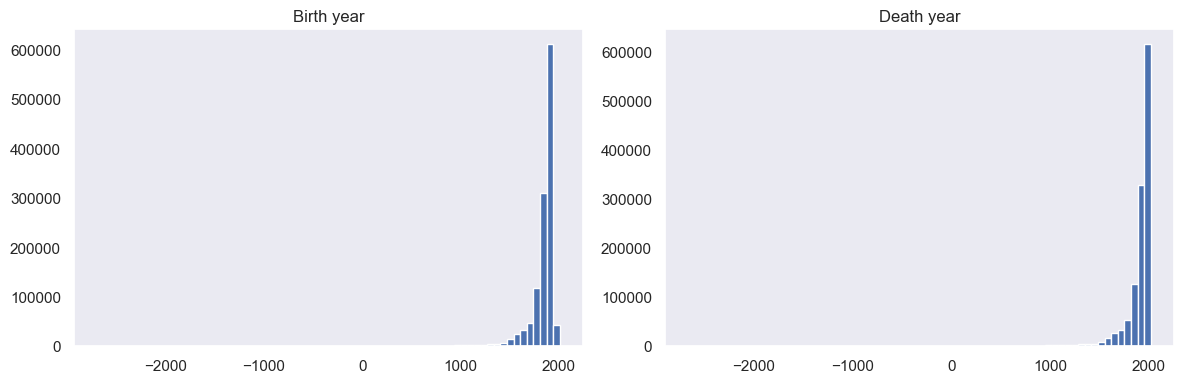

In [64]:
# Plot Histogram to understand the distribution of numeric attributes

plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':100})
plt.rcParams["figure.autolayout"] = True
x1 = df
x2 = df
fig, axes = plt.subplots(1, 2)
x1.hist('Birth year', bins=70, ax=axes[0])
x2.hist('Death year', bins=70, ax=axes[1])
axes[0].grid(None)
axes[1].grid(None)
plt.show()

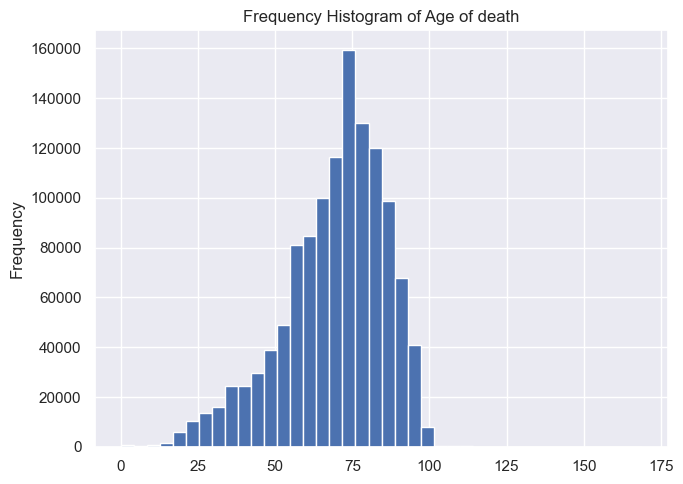

In [65]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
x = df['Age of death']
plt.hist(x, bins=40)
plt.gca().set(title='Frequency Histogram of Age of death', ylabel='Frequency');

In [66]:
df.describe().round()

,Birth year,Death year,Age of death
count,1223009.0,1223008.0,1223008.0
mean,1845.0,1914.0,69.0
std,148.0,152.0,17.0
min,-2700.0,-2659.0,0.0
25%,1828.0,1895.0,60.0
50%,1887.0,1955.0,72.0
75%,1918.0,1994.0,81.0
max,2016.0,2021.0,169.0


In [67]:
idx = df.index[df['Death year'].isnull()]
print(df.shape)
df = df.drop(index=idx)
print(df.shape)
idx = df.index[df['Birth year']>1700]
df = df.drop(index=idx)
print(df.shape)

(1223009, 10)
(1223008, 10)
(108991, 10)


In [68]:
idx = df.index[df['Age of death'].isnull()]
print(df.shape)
df = df.drop(index=idx)
print(df.shape)

(108991, 10)
(108991, 10)


In [69]:
df['Occupation'].value_counts()

Artist                        18816
Politician                    16941
Religious figure              10748
Researcher                     5116
Military personnel             4337
                              ...  
Lady-in-waiting; sovereign        1
Piarist                           1
Industrialist; arms trader        1
Inventor; medic                   1
Goldsmith; jeweller               1
Name: Occupation, Length: 1609, dtype: int64

In [70]:
# Grabbing First Occupation
occ_df = df
occ_df['Occupation'] = occ_df['Occupation'].str.split(';').str[0].str.strip()
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [71]:
idx = occ_df.index[occ_df['Occupation'].isnull()]
print(occ_df.shape)
occ_df = occ_df.drop(index=idx)
print(occ_df.shape)

(108991, 10)
(77394, 10)


In [72]:
occ_df['Occupation'].value_counts()

Artist                18816
Politician            16941
Religious figure      10748
Researcher             5116
Military personnel     4337
                      ...  
Stonemason                1
Curator                   1
Apprentice                1
Zemleprokhodtsy           1
Sufi                      1
Name: Occupation, Length: 745, dtype: int64

In [73]:
occ2_df = occ_df

In [74]:
#Identifying top 10 Occupations

from pandasql import sqldf

query = '''
SELECT Occupation, COUNT(Occupation) AS count
FROM occ_df
GROUP BY Occupation
ORDER BY count DESC
LIMIT 10
'''
sqldf(query)

,Occupation,count
0,Artist,18816
1,Politician,16941
2,Religious figure,10748
3,Researcher,5116
4,Military personnel,4337
5,Aristocrat,2720
6,Physician,1115
7,Architect,1067
8,Jurist,905
9,Judge,617


In [75]:
# Renaming column names to work with SQL
occ_df.rename({'Birth year': 'birthYear', 'Death year': 'deathYear', 'Manner of death':'mannerOfDeath', 'Age of death':'ageOfDeath'}, axis=1, inplace=True)
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [76]:
# Identifying the common age of death across the top 10 Occupations

query = '''

WITH new_view AS

(SELECT Occupation, ageOfDeath, COUNT(ageOfDeath) AS age_ct, COUNT(Occupation) AS oc_ct
FROM occ_df
GROUP BY  Occupation, ageOfDeath
ORDER BY oc_ct DESC)

SELECT Occupation, ageOfDeath AS most_common_ageOfDeath, MAX(age_ct) AS count
FROM new_view
GROUP BY Occupation
ORDER BY oc_ct DESC
LIMIT 10

'''

sqldf(query)

,Occupation,most_common_ageOfDeath,count
0,Artist,70.0,666
1,Politician,70.0,473
2,Religious figure,60.0,340
3,Researcher,70.0,203
4,Military personnel,63.0,115
5,Aristocrat,60.0,71
6,Physician,70.0,41
7,Architect,64.0,39
8,Jurist,70.0,38
9,Judge,64.0,30


In [77]:
# Grabbing First Manner of death
occ_df['mannerOfDeath'] = occ_df['mannerOfDeath'].str.split(';').str[0].str.strip()
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [78]:
top_causes = occ_df.groupby('mannerOfDeath').size().reset_index(name = 'count')
top_causes = top_causes.sort_values(by = 'count', ascending = False).iloc[:20]
top_causes = top_causes.iloc[:6]
print(top_causes)

         mannerOfDeath  count
3   capital punishment    775
11      natural causes    689
7             homicide    518
16             suicide    213
2             accident    140
4      death in battle     35


In [79]:
query = '''

WITH new_view AS

(SELECT Occupation, mannerOfDeath, COUNT(mannerOfDeath) AS cause_ct
FROM occ_df
GROUP BY Occupation, mannerOfDeath
ORDER BY cause_ct DESC)

SELECT Occupation, mannerOfDeath AS common_cause, MAX(cause_ct) AS count
FROM new_view
GROUP BY Occupation
ORDER BY count DESC
LIMIT 10
'''

sqldf(query)

,Occupation,common_cause,count
0,Politician,capital punishment,301
1,Artist,natural causes,156
2,Military personnel,capital punishment,107
3,Religious figure,capital punishment,69
4,Researcher,natural causes,59
5,Aristocrat,natural causes,48
6,Monarch,homicide,30
7,Samurai,suicide,27
8,Sovereign,natural causes,18
9,Ruler,natural causes,18


In [80]:
# Common death ages for the top 6 death causes:
query = '''
WITH new_view AS
    (SELECT mannerOfDeath, ageOfDeath, COUNT(ageOfDeath) AS ct
    FROM occ_df
    WHERE mannerOfDeath IN ('natural causes', 'suicide', 'accident', 'homicide', 'capital punishment', 'death in battle')
    GROUP BY mannerOfDeath, ageOfDeath
    )
SELECT mannerOfDeath, ageOfDeath AS common_ageOfDeath, MAX(ct) AS count
FROM new_view
GROUP BY mannerOfDeath
ORDER BY count DESC
'''
sqldf(query)

,mannerOfDeath,common_ageOfDeath,count
0,capital punishment,46.0,25
1,natural causes,60.0,21
2,homicide,27.0,15
3,suicide,25.0,7
4,accident,44.0,7
5,death in battle,30.0,2


In [81]:
data = pd.DataFrame(occ2_df.groupby(['Occupation', 'mannerOfDeath']).size().reset_index(name = 'count').sort_values(by = 'count', ascending = False))

In [82]:
top_causes

,mannerOfDeath,count
3,capital punishment,775
11,natural causes,689
7,homicide,518
16,suicide,213
2,accident,140
4,death in battle,35


In [83]:
cause_occ2_df = data.loc[(data['mannerOfDeath']=='capital punishment')|(data['mannerOfDeath']=='natural causes')|(data['mannerOfDeath']=='homicide')
|(data['mannerOfDeath']=='suicide')|(data['mannerOfDeath']=='accident')|(data['mannerOfDeath']=='death in battle')]
cause_occ2_df.head()

,Occupation,mannerOfDeath,count
194,Politician,capital punishment,301
197,Politician,homicide,203
199,Politician,natural causes,168
18,Artist,natural causes,156
143,Military personnel,capital punishment,107


Text(0.5, 1.0, 'Cause of Death by Top Occupation')

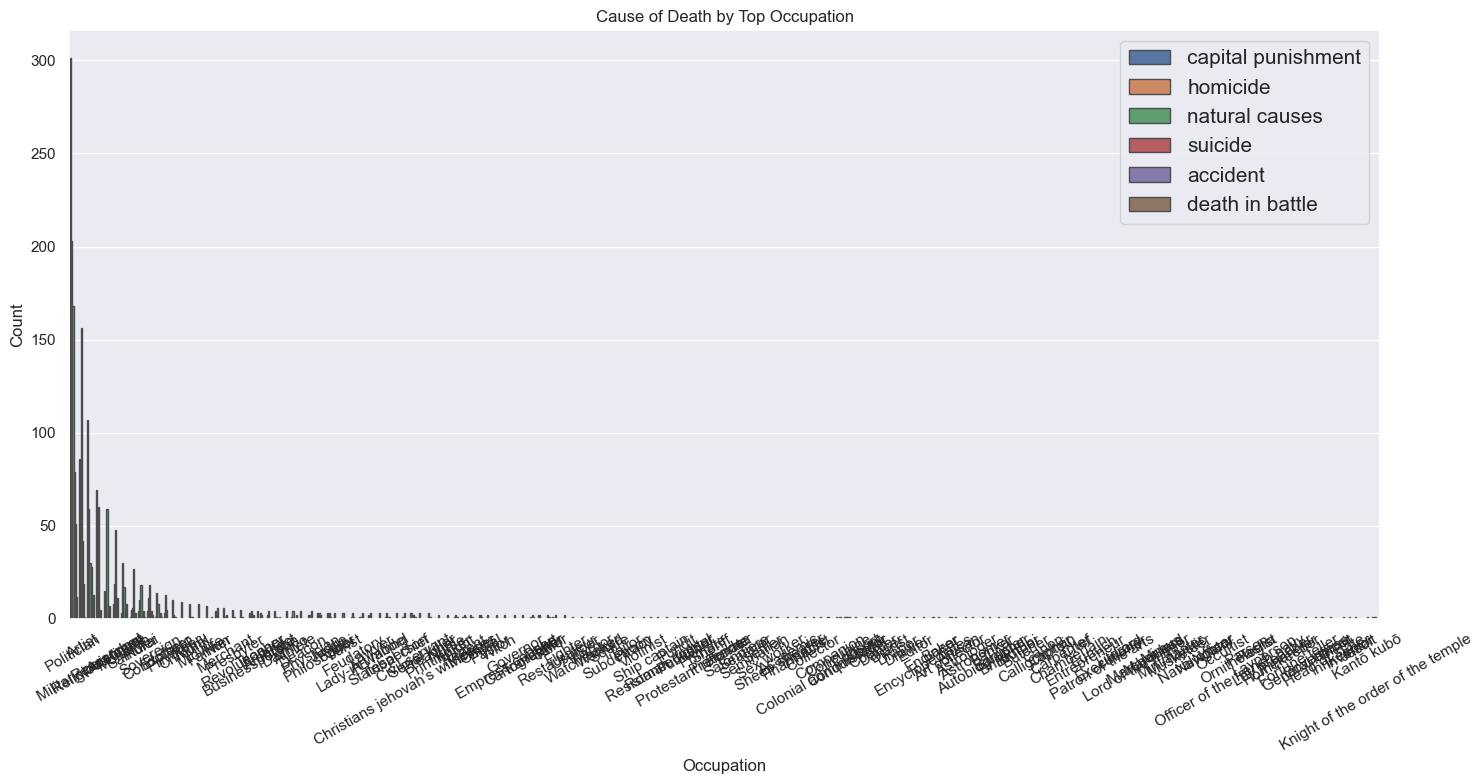

In [84]:
fig = plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'Occupation', y = 'count', hue ='mannerOfDeath', data = cause_occ2_df, edgecolor=".3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Cause of Death by Top Occupation')

In [85]:
occ2_df = occ_df.loc[(occ_df['Occupation']=='Artist')|(occ_df['Occupation']=='Politician')|(occ_df['Occupation']=='Religious figure')
                        |(occ_df['Occupation']=='Aristocrat')|(occ_df['Occupation']=='Researcher')|(occ_df['Occupation']=='Physician')
                        |(occ_df['Occupation']=='Military personnel')|(occ_df['Occupation']=='Architect')|(occ_df['Occupation']=='Jurist')|(occ_df['Occupation']=='Judge')]

In [86]:
occ2_df['Occupation'].value_counts()

Artist                18816
Politician            16941
Religious figure      10748
Researcher             5116
Military personnel     4337
Aristocrat             2720
Physician              1115
Architect              1067
Jurist                  905
Judge                   617
Name: Occupation, dtype: int64

In [87]:
occ2_df.head()

,Id,Name,Short description,Gender,Country,Occupation,birthYear,deathYear,mannerOfDeath,ageOfDeath
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
29,Q498,"Ulrich Frédéric Woldemar, Comte de Lowendal",German-born French soldier and statesmen (1700...,Male,Denmark; Russian Empire; Kingdom of France; El...,Politician,1700,1755.0,NaN,55.0
42,Q590,Luís de Camões,Portuguese poet,Male,NaN,Artist,1524,1580.0,NaN,56.0
43,Q619,Nicolaus Copernicus,"Renaissance-era mathematician, astronomer, and...",Male,Kingdom of Poland,Researcher,1473,1543.0,natural causes,70.0


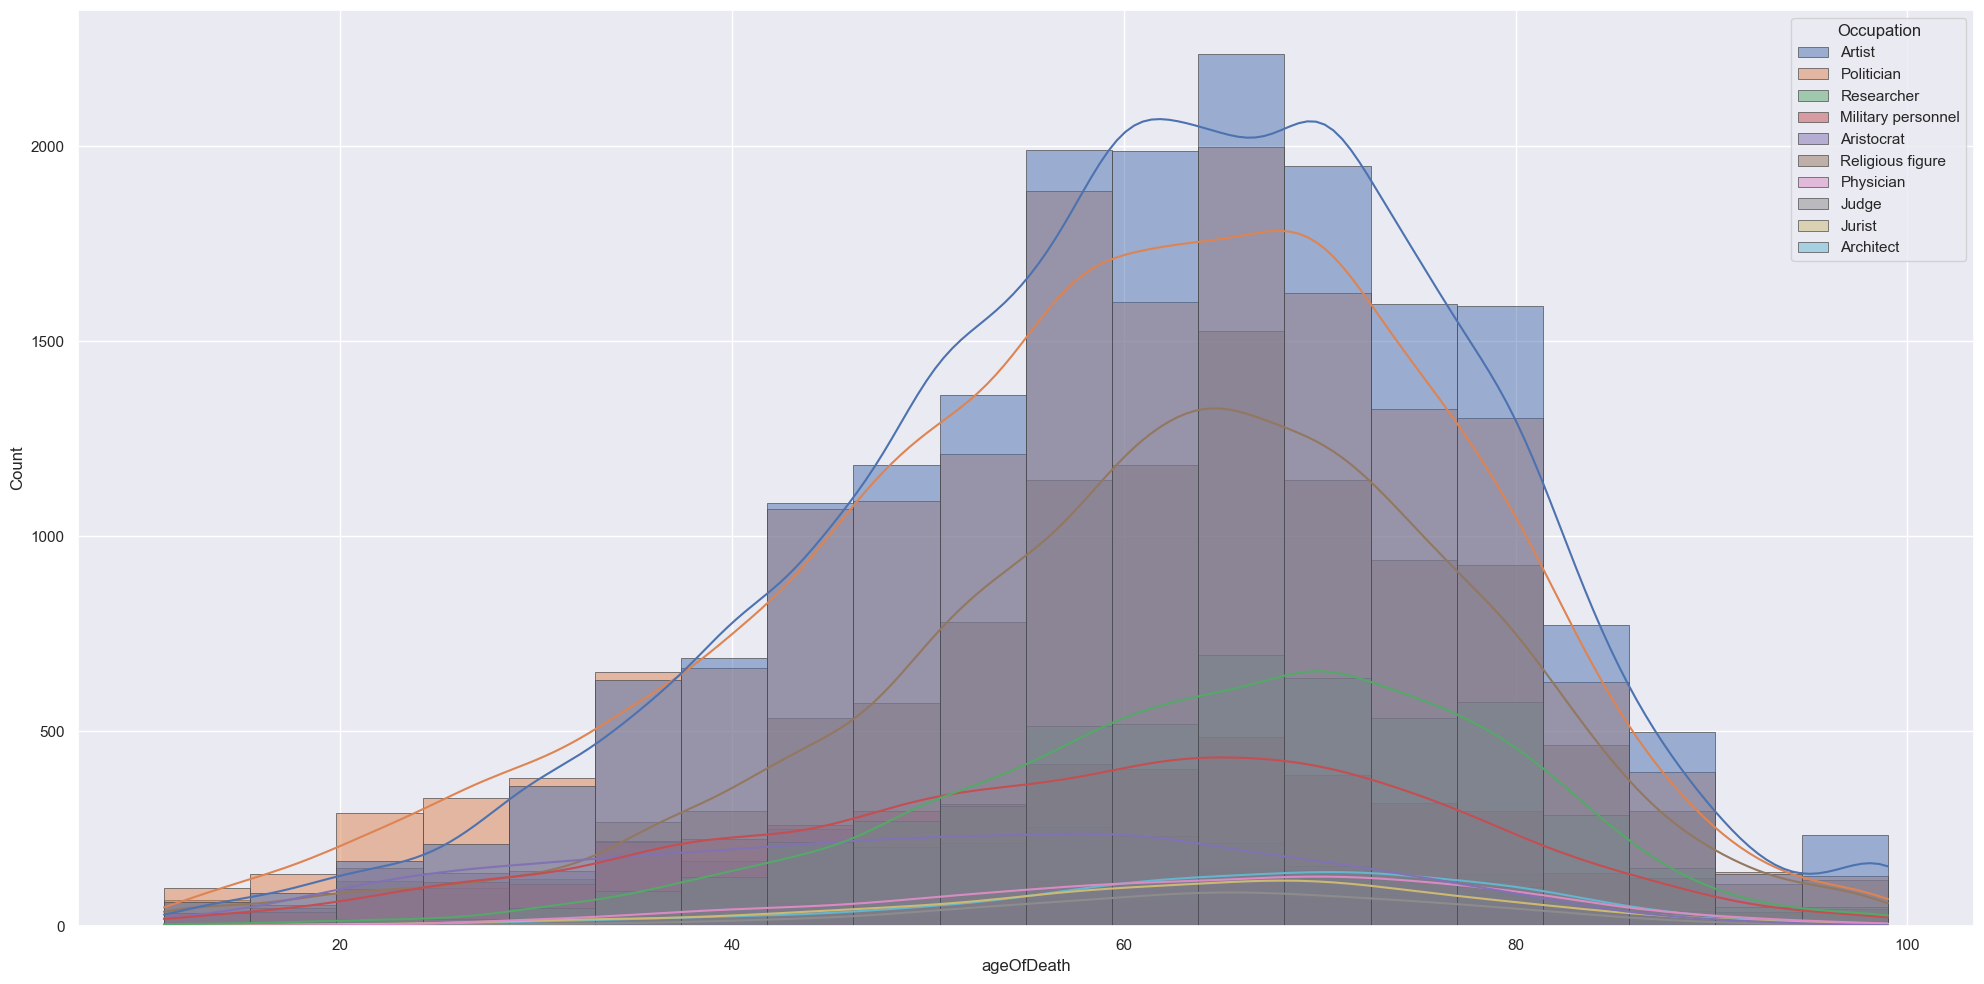

In [88]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = occ2_df, x = occ2_df['ageOfDeath'],
             hue = occ2_df['Occupation'], edgecolor=".3", linewidth=.5, bins=20, kde=True)
plt.show()

### Politicians

In [89]:
dataset = pd.read_csv(file_name)
#dataset.head(20)
df = dataset
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [90]:
idx = df.index[df['Death year'].isnull()]
print(df.shape)
df = df.drop(index=idx)
print(df.shape)
idx = df.index[df['Birth year']>1700]
df = df.drop(index=idx)
print(df.shape)

(1223009, 10)
(1223008, 10)
(108991, 10)


In [91]:
occ_df = df
occ_df['Occupation'] = occ_df['Occupation'].str.split(';').str[0].str.strip()
occ_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0
11,Q307,Galileo Galilei,"Italian mathematician, physicist, philosopher ...",Male,Grand Duchy of Tuscany; Duchy of Florence,Astronomer,1564,1642.0,NaN,78.0
13,Q346,Louis IX of France,king of France,Male,France,Ruler,1214,1270.0,natural causes,56.0
15,Q353,Blanche of Castile,"Spanish princess and saint, queen consort of F...",Female,Kingdom of Castile,Regent,1188,1252.0,NaN,64.0


In [92]:
#Removing data objects with Null values for Occupation
idx = occ_df.index[occ_df['Occupation'].isnull()]
print(occ_df.shape)
occ_df = occ_df.drop(index=idx)
print(occ_df.shape)

(108991, 10)
(77394, 10)


In [93]:
#Removing data objects with Null values for Short Description
idx = occ_df.index[occ_df['Short description'].isnull()]
print(occ_df.shape)
occ_df = occ_df.drop(index=idx)
print(occ_df.shape)

(77394, 10)
(76062, 10)


In [94]:
sd_df = occ_df[['Occupation','Short description']]
print(sd_df.shape)
sd_df.head()

(76062, 2)


,Occupation,Short description
8,Artist,Spanish painter (1599-1660)
9,Artist,"Greek painter, sculptor and architect"
11,Astronomer,"Italian mathematician, physicist, philosopher ..."
13,Ruler,king of France
15,Regent,"Spanish princess and saint, queen consort of F..."


In [95]:
sd_df.isna().sum()

Occupation           0
Short description    0
dtype: int64

In [96]:
test = sd_df

In [97]:
## Lower case
test['Short description'] = test['Short description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
## remove tabulation and punctuation
test['Short description'] = test['Short description'].str.replace('[^\w\s]',' ')
## digits
test['Short description'] = test['Short description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
test['Short description'] = test['Short description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
test['Short description'] = test['Short description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(test.head())

/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_22409/4219851191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Short description'] = test['Short description'].apply(lambda x: " ".join(x.lower()for x in x.split()))
/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_22409/4219851191.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test['Short description'] = test['Short description'].str.replace('[^\w\s]',' ')
/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_22409/4219851191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

Preprocessed data: 

    Occupation                                  Short description
8       Artist                                    spanish painter
9       Artist                   greek painter sculptor architect
11  Astronomer  italian mathematician physicist philosopher as...
13       Ruler                                        king france
15      Regent        spanish princess saint queen consort france


/var/folders/3v/8c4h0_nj36l6vkszy1szz5280000gn/T/ipykernel_22409/4219851191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Short description'] = test['Short description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [98]:
# jda stands for job description aggregated
jda = test.groupby(['Occupation']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jda)

Aggregated job descriptions: 

                    Occupation  \
0                       Abbess   
1                         Abbé   
2                     Academic   
3                   Accountant   
4                      Acolyte   
..                         ...   
726  Woodwind instrument maker   
727             Writing master   
728                Xylographer   
729            Zemleprokhodtsy   
730                      Župan   

                                     Short description  
0    member house habsburgenglish princessabbess ro...  
1    founder seminary saint sulpice montrealfrench ...  
2    spanish noble academicenglish scholarconfessor...  
3    royal governor la floridaenglish accountant au...  
4                                              acoliet  
..                                                 ...  
726                   german woodwind instrument maker  
727                             english writing master  
728                                  german pri

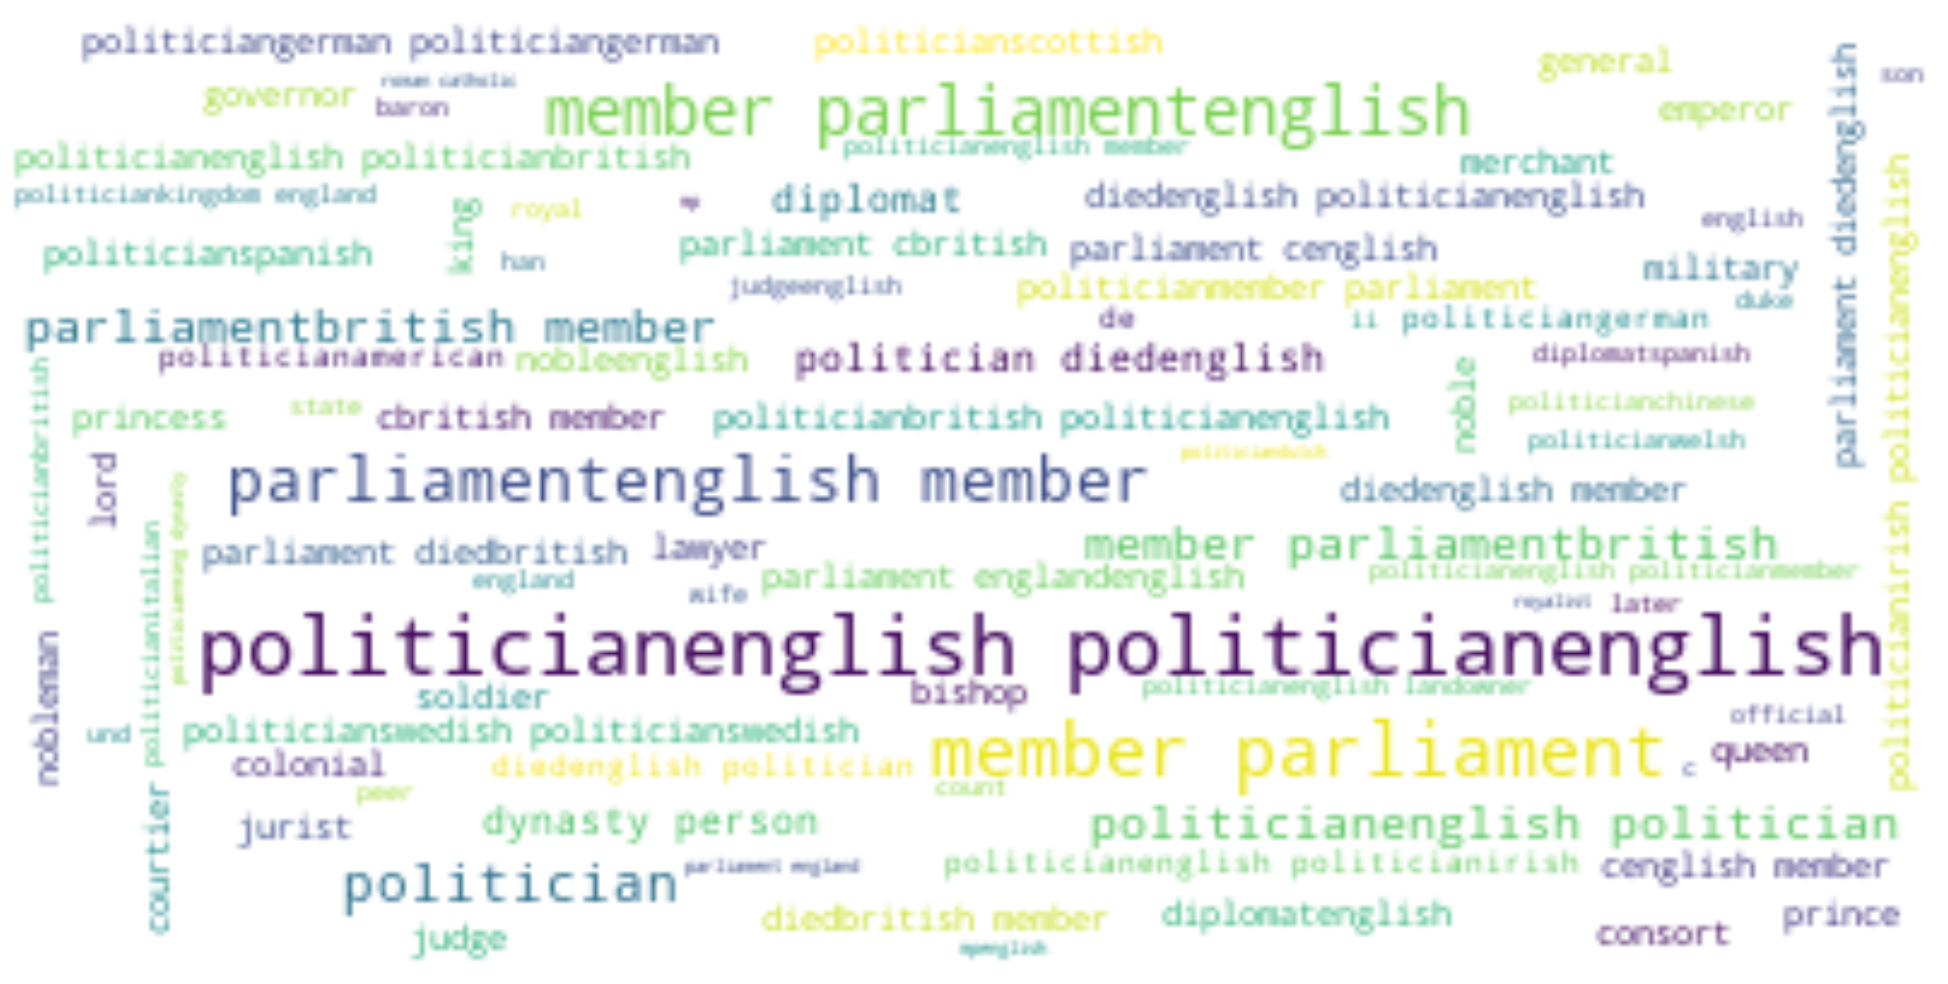

In [99]:
f, ax = plt.subplots(figsize=(20, 10))
# Start with one review:
text = jda['Short description'][jda.Occupation == 'Politician'].iloc[0]
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100).generate(text)
#print("\n***",job,"***\n")
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
#filtered_words = [word for word in text.split() if word not in stopwords]
filtered_words = text.split()
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(40):
    words.append(letter)
    counts.append(count)

In [101]:
#filtered_words = [word for word in text.split() if word not in stopwords]
filtered_words = text.split()
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(40):
    words.append(letter)
    counts.append(count)

<BarContainer object of 40 artists>

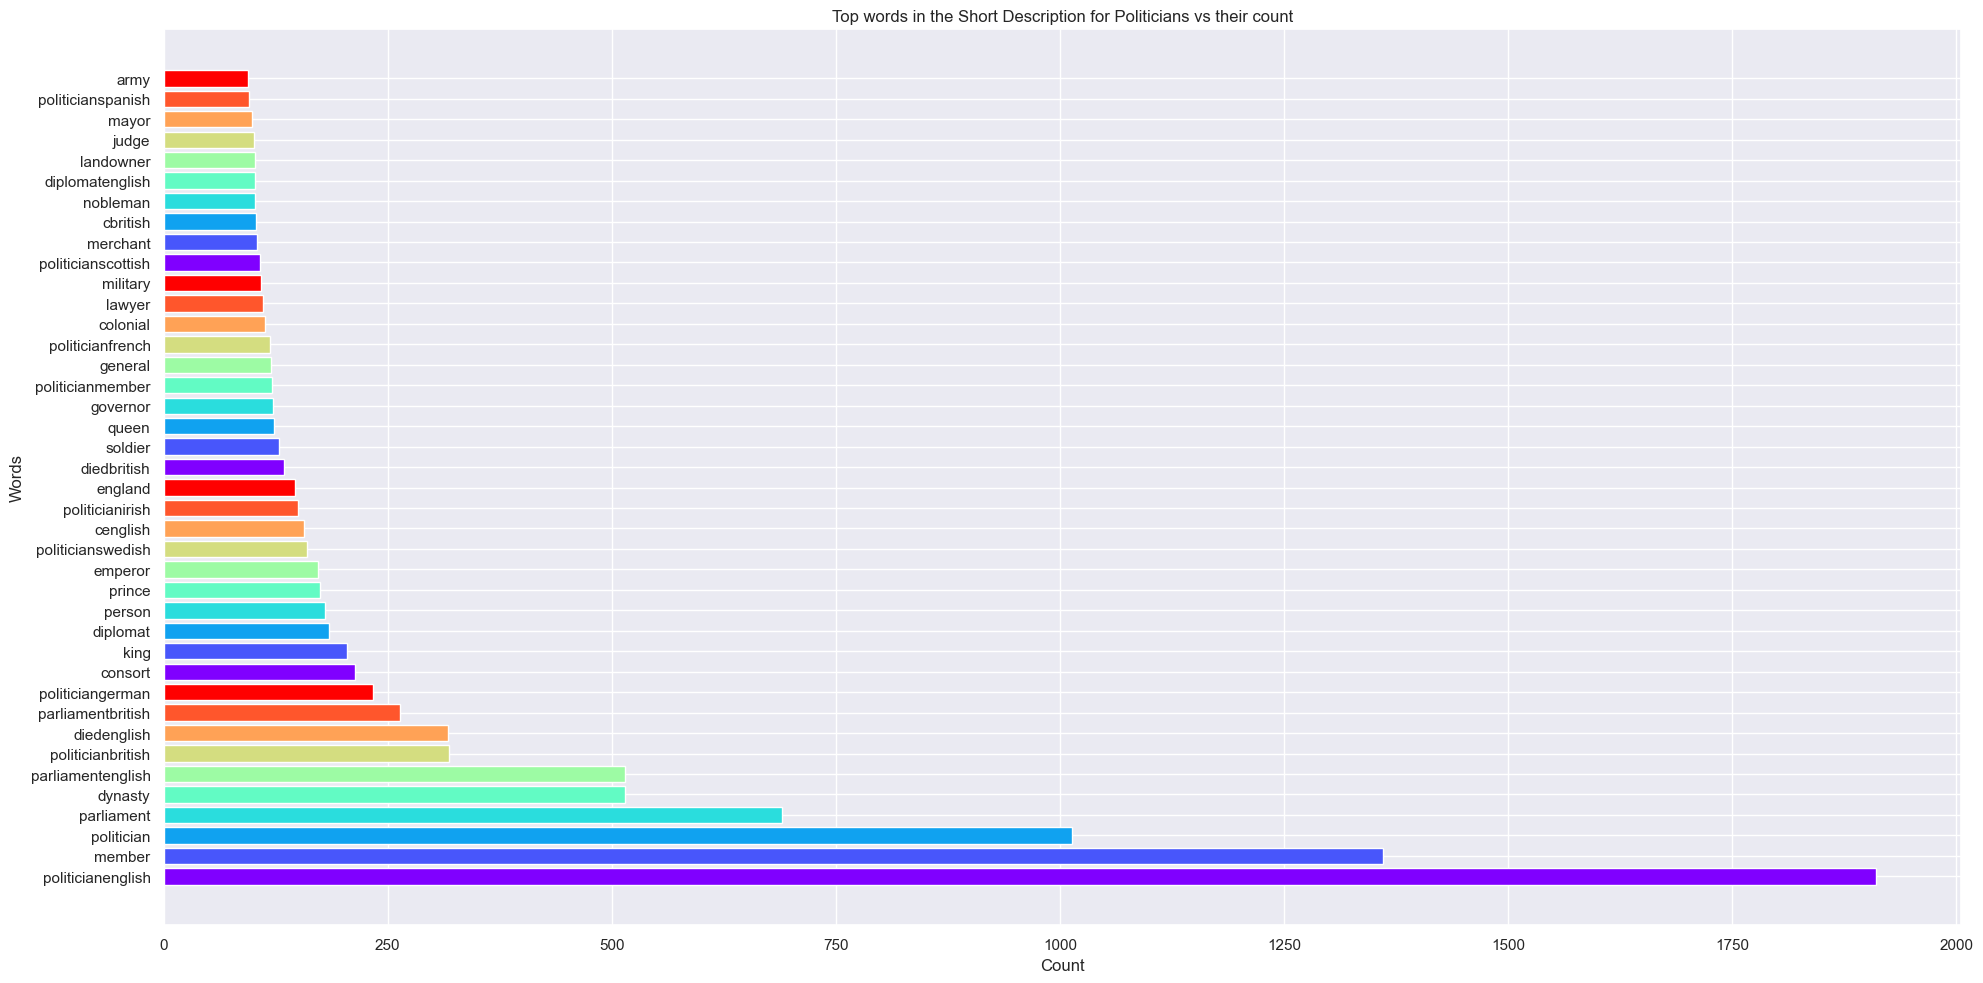

In [102]:
import matplotlib.cm as cm
from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the Short Description for Politicians vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [103]:
pol_df = occ_df.loc[occ_df['Occupation'] == 'Politician']
pol_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
29,Q498,"Ulrich Frédéric Woldemar, Comte de Lowendal",German-born French soldier and statesmen (1700...,Male,Denmark; Russian Empire; Kingdom of France; El...,Politician,1700,1755.0,NaN,55.0
181,Q1786,Jan I Carondelet,Burgundian jurist and politician,Male,Burgundian Netherlands,Politician,1428,1502.0,NaN,74.0
183,Q1791,Jan II Carondelet,"Burgundian cleric, politician, jurist, and adv...",Male,Burgundian Netherlands,Politician,1469,1544.0,NaN,75.0
184,Q1798,Ferry Carondelet,"Habsburg diplomat, advisor, and abbot (1473-1528)",Male,NaN,Politician,1473,1528.0,NaN,55.0
336,Q4735,John Hamilton,Scottish nobleman (1537-1604),Male,Kingdom of Scotland,Politician,1537,1604.0,NaN,67.0


In [104]:
contain_values_king = pol_df[pol_df['Short description'].str.contains('king' , na=False)]
contain_values_king.describe()

,Birth year,Death year,Age of death
count,158.000000,158.000000,158.000000
mean,869.892405,920.765823,50.873418
std,731.050371,729.556432,19.297118
min,-1800.000000,-1734.000000,13.000000
25%,477.000000,520.000000,37.250000
50%,1057.000000,1114.000000,49.000000
75%,1468.000000,1499.250000,62.750000
max,1700.000000,1770.000000,94.000000


In [105]:
contain_values_gov = pol_df[pol_df['Short description'].str.contains('governor' , na=False)]
contain_values_gov.describe()

,Birth year,Death year,Age of death
count,167.000000,167.000000,167.000000
mean,1581.652695,1643.928144,62.275449
std,212.994511,212.757302,15.952363
min,150.000000,180.000000,15.000000
25%,1598.500000,1656.500000,50.500000
50%,1637.000000,1695.000000,63.000000
75%,1663.500000,1728.500000,73.500000
max,1700.000000,1778.000000,99.000000


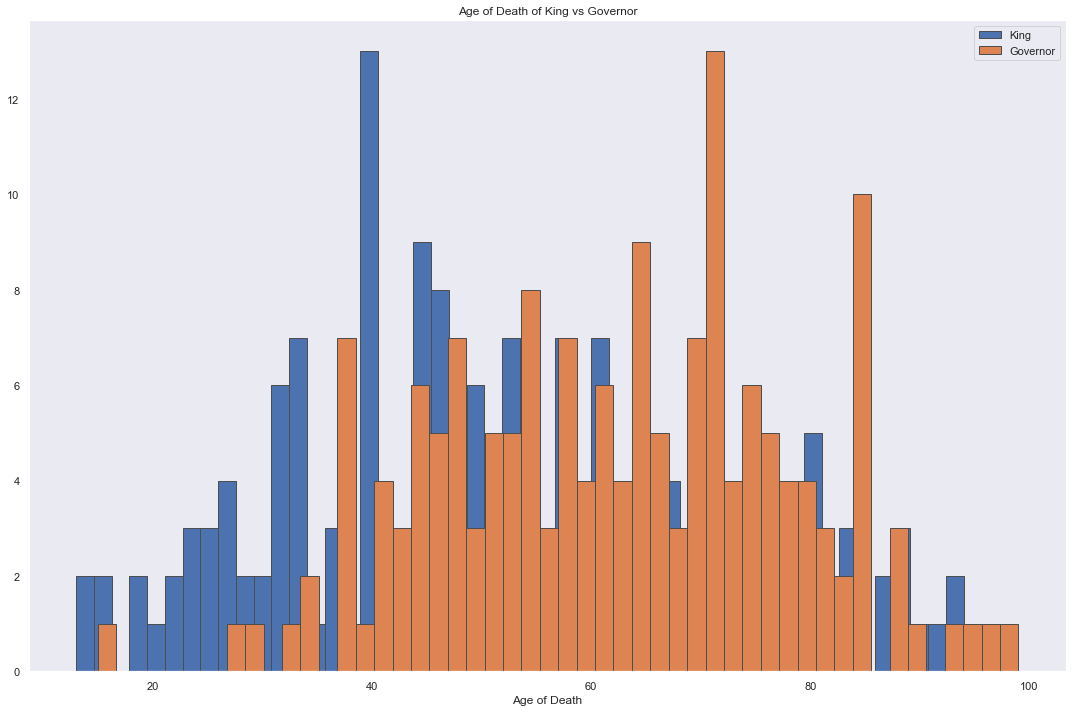

In [106]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas

fig = plt.figure(figsize = (15,10))
contain_values_king ['Age of death'].hist(bins=50, edgecolor=".3", label=['King'])
contain_values_gov['Age of death'].hist(bins=50, edgecolor=".3", label=['Governor'])
plt.xlabel('Age of Death')
#plt.ylabel('Count')
plt.title('Age of Death of King vs Governor')
plt.grid(b=None)
plt.legend()